## Projet Notebook group / Mars 2021

### La groupe7:	Hanène,	Pierre-Antoine,	Daria

### LLLL

### 1. Choix de la thème: World Happiness Report


##### World Happiness Report
Happiness scored according to economic production, social support, etc.

Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


### 2. Dataset: https://www.kaggle.com/unsdsn/world-happiness

In [1]:
import pandas as pd
import panel as pn
pn.extension()
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

####  - On a choisi analiser les données de 2019 

In [2]:
df_2019=pd.read_csv("2019.csv", sep=',')

df_2019.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


#### - Checking info because of the data types and missing values:


In [3]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### - Describing datas:

In [4]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


#### - On comptabilise les données manquantes et on retire les lignes si besoin:

In [5]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

#### il y a aucune données manquantes !

#### On remarque qu'il y a bien 156 pays pour toutes les colonnes
#### Les moyennes et le valeurs max sont cohérentes 
#### il y a juste des 0 en valeurs minimum donc on va les quantifier, si il y a moins de 10% ça ne va pas nous géner. 

In [6]:
df_2019.isin([0]).sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

#### - On fait une modèle de corrélation:

[Text(0.5, 0, 'Overall rank'),
 Text(1.5, 0, 'Score'),
 Text(2.5, 0, 'GDP per capita'),
 Text(3.5, 0, 'Social support'),
 Text(4.5, 0, 'Healthy life expectancy'),
 Text(5.5, 0, 'Freedom to make life choices'),
 Text(6.5, 0, 'Generosity'),
 Text(7.5, 0, 'Perceptions of corruption')]

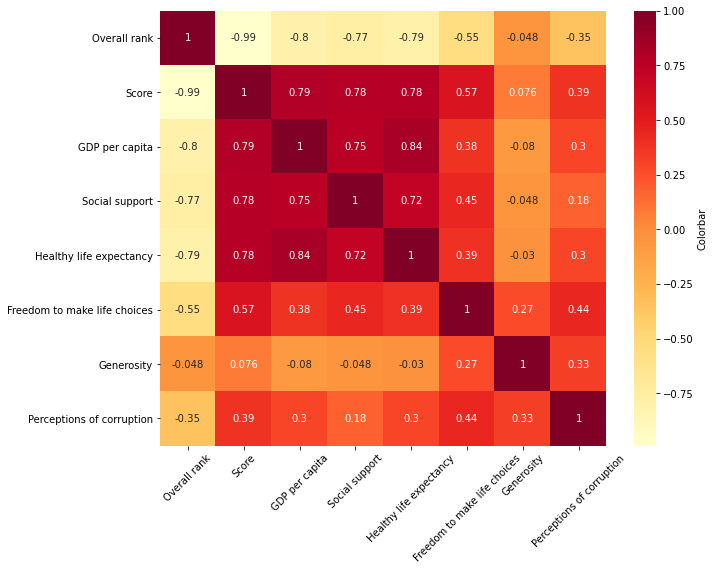

In [29]:
df_2019 = pd.DataFrame(df_2019)
corrMatrix = df_2019.corr()
plt.subplots(figsize=(10,8))
fig1=sns.heatmap(corrMatrix, annot=True, cmap="YlOrRd", cbar_kws={'label': 'Colorbar'})
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45) 

#### Grace au modèle de correlation on remarque que le score - somme des variables pour mesurer le bonheur - 
#### est fortement corrélé avec le GPD per capita et pas corrélé avec la generosity ! 

### 5. Plotter un catplot de ces 2 colonnes (ou tout autre visu qui pourrait confirmer ou infirmer le choix précédent)

#### Voici deux regression linéaires simples qui illustrent nos propos :

Text(0.5, 1.0, 'Simple Linear Regression Score - GDP per capita')

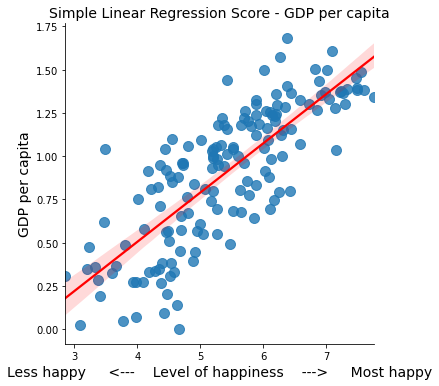

In [27]:

fig2=sns.lmplot(x="Score", y="GDP per capita", data=df_2019, line_kws={'color': 'red'}, scatter_kws={"s": 100})
plt.xlabel('Less happy     <---    Level of happiness    --->     Most happy', fontsize=14)
plt.ylabel('GDP per capita', fontsize=14)
plt.title('Simple Linear Regression Score - GDP per capita', fontsize=14)
 

Text(0.5, 1.0, 'Simple Linear Regression Score - Perceptions of corruption')

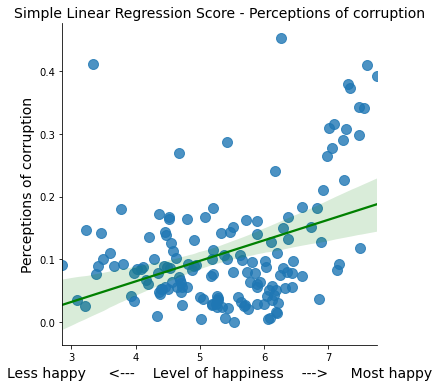

In [6]:
fig2=sns.lmplot(x="Score", y="Perceptions of corruption", data=df_2019, line_kws={'color': 'green'}, scatter_kws={"s": 100})
plt.xlabel('Less happy     <---    Level of happiness    --->     Most happy', fontsize=14)
plt.ylabel('Perceptions of corruption', fontsize=14)
plt.title('Simple Linear Regression Score - Perceptions of corruption', fontsize=14)
 

Text(0.5, 1.0, 'Simple Linear Regression Score - Healthy life expectancy')

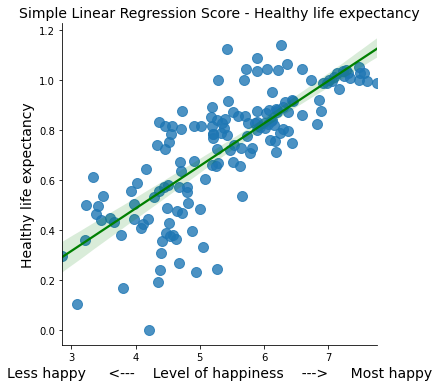

In [5]:
fig2=sns.lmplot(x="Score", y="Healthy life expectancy", data=df_2019, line_kws={'color': 'green'}, scatter_kws={"s": 100})
plt.xlabel('Less happy     <---    Level of happiness    --->     Most happy', fontsize=14)
plt.ylabel('Healthy life expectancy', fontsize=14)
plt.title('Simple Linear Regression Score - Healthy life expectancy', fontsize=14)

Text(0.5, 1.0, 'Simple Linear Regression Score - Freedom to make life choices')

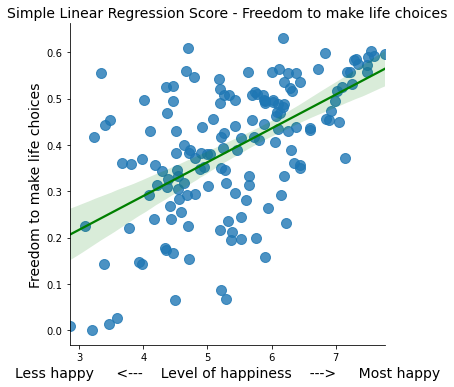

In [7]:
fig2=sns.lmplot(x="Score", y="Freedom to make life choices", data=df_2019, line_kws={'color': 'green'}, scatter_kws={"s": 100})
plt.xlabel('Less happy     <---    Level of happiness    --->     Most happy', fontsize=14)
plt.ylabel('Freedom to make life choices', fontsize=14)
plt.title('Simple Linear Regression Score - Freedom to make life choices', fontsize=14)

Text(0.5, 1.0, 'Simple Linear Regression Healthy life expectancy - GDP per capita')

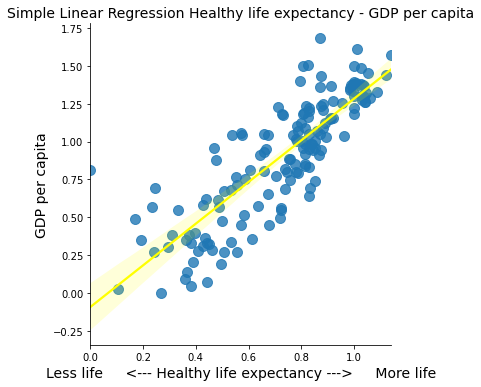

In [3]:
fig2=sns.lmplot(x="Healthy life expectancy", y="GDP per capita", data=df_2019, line_kws={'color': 'yellow'}, scatter_kws={"s": 100})
plt.xlabel('Less life     <--- Healthy life expectancy --->     More life', fontsize=14)
plt.ylabel('GDP per capita', fontsize=14)
plt.title('Simple Linear Regression Healthy life expectancy - GDP per capita', fontsize=14)

Text(0.5, 1.0, 'Simple Linear Regression Score - Generosity')

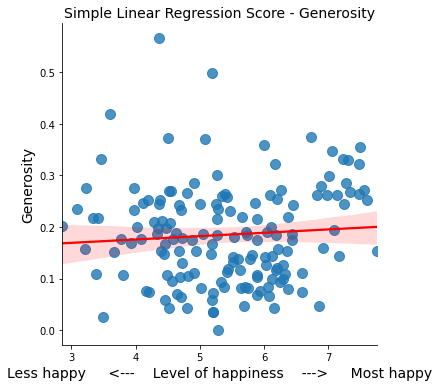

In [25]:
fig3=sns.lmplot(x="Score", y="Generosity", data=df_2019, line_kws={'color': 'red'}, scatter_kws={"s": 100})
plt.xlabel('Less happy     <---    Level of happiness    --->     Most happy', fontsize=14)
plt.ylabel('Generosity', fontsize=14)
plt.title('Simple Linear Regression Score - Generosity', fontsize=14)


#### Simple Linear Regression Score - GDP per capita

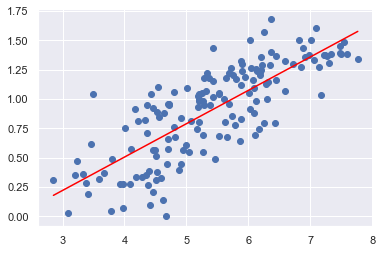

In [73]:
linear_reg=LinearRegression()

x=df_2019.Score.values.reshape(-1,1)
y=df_2019["GDP per capita"].values.reshape(-1,1)

linear_reg.fit(x,y)

fig4=plt.scatter(df_2019["Score"],df_2019["GDP per capita"])
y_head = linear_reg.predict(x) 
plt.plot(x,y_head,color="red")

plt.show()

### 6. Utiliser le TP intro stats pour trouver le meilleur predicteur (ici une fonction lineaire y = ax + b), selon la methode des moindres carrés
### 7. Evaluer la qualité du predicteur en calculant son RMSE (Root Mean Squared Error)

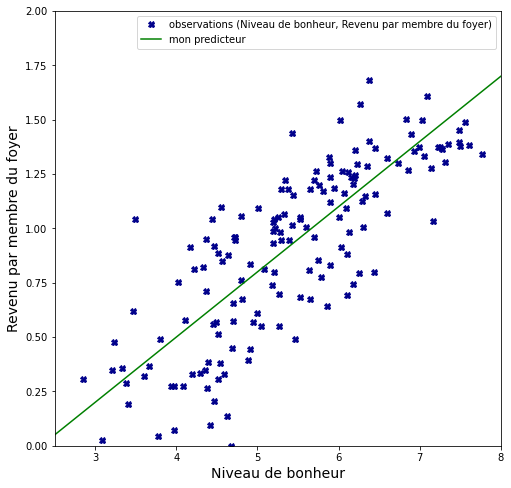

In [20]:
def pred_a(x):
    a=0.3
    b=-0.7
    f=[]
    for elem in x:
        f.append(a*elem+b)
    return f

xl=[0,10]

fig = plt.figure(figsize=(8,8))
plt.plot(df_2019['Score'],df_2019['GDP per capita'],'X',c='darkblue',label='observations (Niveau de bonheur, Revenu par membre du foyer)')
plt.plot(xl,pred_a(xl),c='green',label='mon predicteur')
plt.xlabel('Niveau de bonheur', fontsize=14)
plt.ylabel('Revenu par membre du foyer', fontsize=14)
plt.xlim([0,8])
plt.ylim([0,2])
plt.xlim([2.5,8])
#plt.ylim([0,2])
plt.legend()
plt.show()

In [5]:
x=df_2019['Score']
y=df_2019['GDP per capita']

#### - Exemple calcul d'une fonction implementation d'une fonction somme et equivalence pandas

In [6]:
# Exemple calcul d'une fonction implementation d'une fonction somme et equivalence pandas
tmp=0
for i in range(len(x)):
    tmp=tmp+x[i]*y[i]
print(tmp,(df_2019['Score']*df_2019['GDP per capita']).sum())

818.066182 818.066182


In [7]:
# Calcul des membres principaux de la solution a et b
# Puis calcul du a


un=len(x)*(df_2019['Score']*df_2019['GDP per capita']).sum()

sumx=df_2019['Score'].sum()
sumy=df_2019['GDP per capita'].sum()

deux=len(df_2019['Score'])*((df_2019['Score']*df_2019['Score']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

0.2841334336680397

In [8]:
# Puis calcul du b
quatre=sumy*((df_2019['Score']*df_2019['Score']).sum())
cinq=sumx*(df_2019['Score']*df_2019['GDP per capita']).sum()
six=len(df_2019['Score'])*((df_2019['Score']*df_2019['Score']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

-0.6311893604681201

In [9]:
a=0.284133433668038
b=-0.6311893604681114

def pred(x,a,b):
    return a*x+b

pred(2,a,b)

-0.06292249313203535

In [12]:
import math

est_p=[pred(i,a,b) for i in x]
est_pa=pred_a(x) 

print("RMSE du meilleur predicteur selon moindre carré",math.sqrt(((pd.Series(est_p)-df_2019['GDP per capita'])**2).sum()/len(df_2019)))
print("RMSE du predicteur identifié analytiquement", math.sqrt(((pd.Series(est_pa)-df_2019['GDP per capita'])**2).sum()/len(df_2019)))

RMSE du meilleur predicteur selon moindre carré 0.24147127831033313
RMSE du predicteur identifié analytiquement 0.24270696679487638


In [13]:
def rmse(data_x,data_y):
    i = 0
    res = 0
    
    for i in range(len(data_x)):
              
        res += ((nouv_prediction(data_x[i])-data_y[i])**2)/len(data_x)
    
    return math.sqrt(res)


def nouv_prediction(x):
    a = 0.284133433668038
    b = -0.6311893604681114
    return a*x+b

#### Nous allons maintenant chercher à évaluer le modèle grace à un indicateur de performance : le RMSE

In [14]:
# Nous allons maintenant chercher à évaluer le modèle grace à un indicateur de performance : le RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_2019['Score'], est_p))
print(rmse)

4.5714805497369175


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_2019['GDP per capita'], est_p))
print(rmse)

0.24147127831033313


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_2019['Generosity'], est_p))
print(rmse)

0.7891123134110192
